# RED NEURONAL CONVOLUCIONAL
## Analizador de Placa Torax Neumonía

Las **redes neuronales convolucionales** es un algoritmo de **Deep Learning** que trabaja con imágenes, las procesa y extrae características en función del modelo entrenado que luego seran usadas para la **clasificación de objetos**. 

Con esta breve introducción voy a explicar de que trata mi proyecto. Gracias a la web de kaggle conseguí **1.24GB de fotos** que son un total de **5.863 imágenes de placas de torax en pacientes**, las cuales estaban divididas en **placas normales** y **placas con neumonía**.

link data: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Mi idea era realizar esta red neuronal y si tenía una buena precisión exportar este modelo para un programa externo que utilizaría una interfaz gráfica como por ejemplo tkinter y así poder analizar de forma manual nuevas placas de torax de pacientes que el modelo no conozca. 

Este proyecto se ha realizado con **Python, TensorFlow, Tkinter, Pandas, Numpy, Matplotlib en la IDE Anaconda utilizando Spyder**.

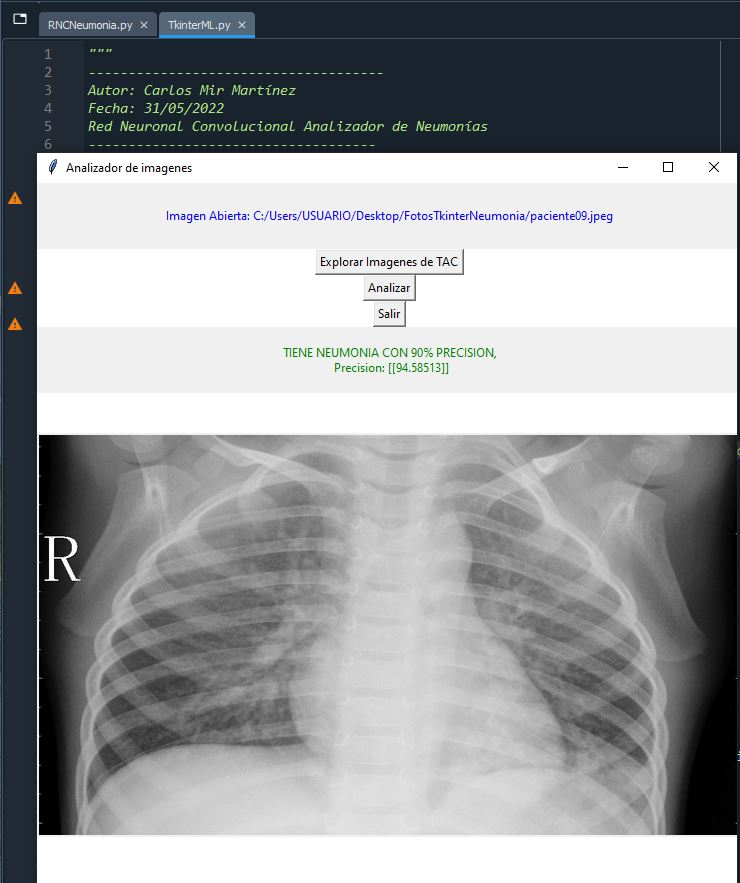

In [2]:
from IPython.display import Image
Image("C:/Users/USUARIO/Desktop/capturatkinter.jpg")

A continuación voy a explicar como he creado esta red neuronal convolucional y como la he entrenado paso a paso.

### LIBRERÍAS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator # Preprocesa las images y rescala
import warnings
import cv2
import os
warnings.filterwarnings('ignore')

### VISUALIZACIÓN DE DATOS

Los archivos ya vienen divididos en diferentes carpetas para su **entrenamiento** y **testing** y dentro de cada uno de ellos también están divididos en **placas normales** y **placas con neumonía**. Esto ahorra preprocesar los datos y dividirlos con el **train_test_split**. En este caso:
- **test**, tiene **624 imágenes**.
- **train**, tiene **5216 imágenes**.

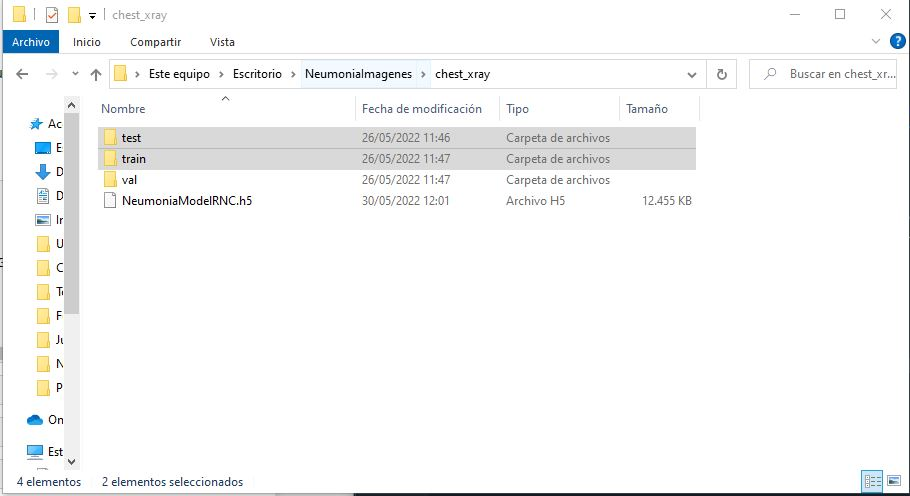

In [5]:
Image("C:/Users/USUARIO/Desktop/folder.jpg")

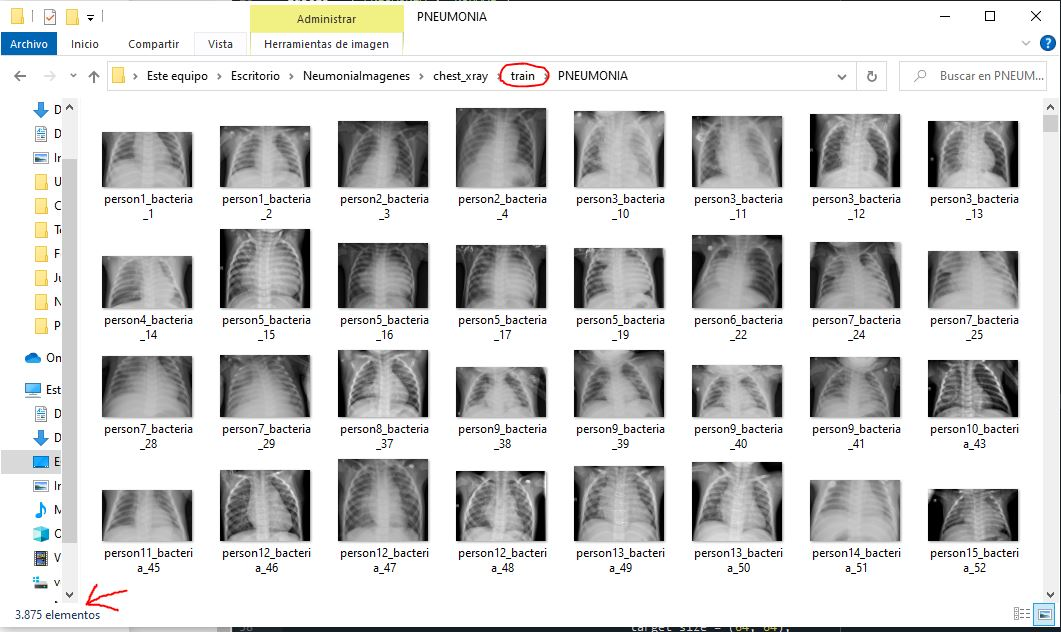

In [6]:
Image("C:/Users/USUARIO/Desktop/folder01.jpg")

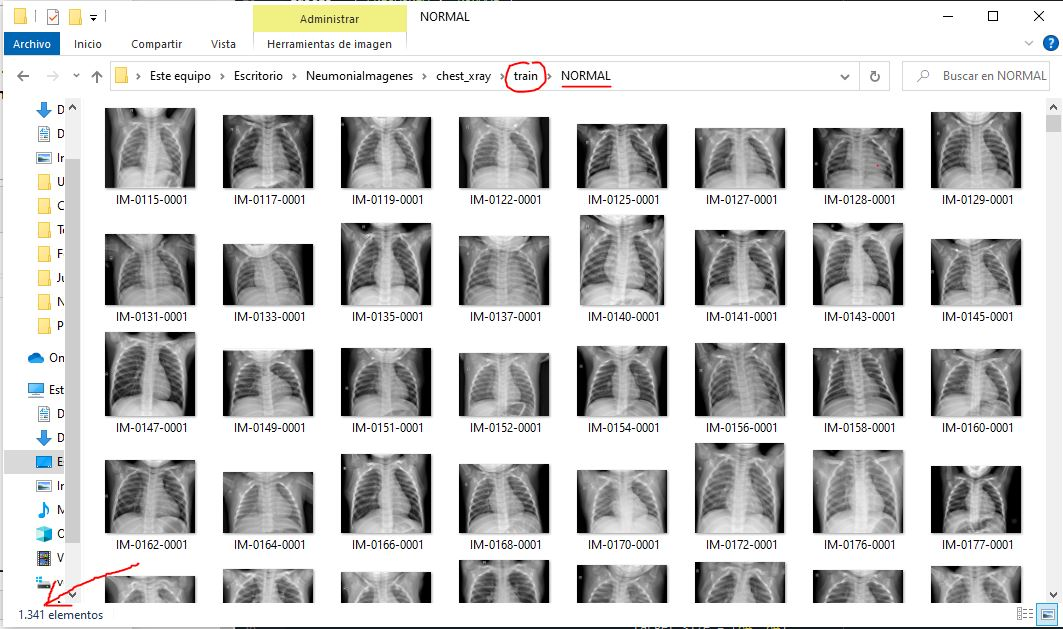

In [7]:
Image("C:/Users/USUARIO/Desktop/folder02.jpg")

### PREPROCESADO

Como las imágenes tienen cada una **tamaño distinto** hay que **rescalarlas y redimensionarlas** para que el algoritmo sea capaz de procesar correctamente sus características. Para ello la libreria **keras** tiene una función llamada **ImageDataGenerator**.

In [8]:
# Preprocesado
# Rescala las imagenes del Train
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Rescala las imagenes del test
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creando el DF Training SET
training_set = train_datagen.flow_from_directory('C:/Users/USUARIO/Desktop/NeumoniaImagenes/chest_xray/train',
                                                 target_size = (64, 64),
                                                 class_mode = 'binary')

# Creando el DF Test SET
test_set = test_datagen.flow_from_directory('C:/Users/USUARIO/Desktop/NeumoniaImagenes/chest_xray/test',
                                            target_size = (64, 64),
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### MODELO RED NEURONAL CONVOLUCIONAL
Ahora he creado un modelo secuencial al que se le van agregando capas que iran procesando las imágenes en 2D. Utilizando **keras y tensorflow**. La función sigmoide de salida analizará los resultados.

In [9]:
# Creamos la red RNC, Convolucion --> Pooling --> Flattenin --> Full Connect
RNC = tf.keras.models.Sequential()
# 1º Capa Convolucion2D, entrada de datos
RNC.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 3]))
# 2º Capa - Pooling, Simplifica los problemas y reduce las operaciones
RNC.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
# 3º Capa de Convolucion y Pooling
RNC.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
RNC.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
# 4º Capa - Flattening, adapta la estructura de forma vertical en una columna
RNC.add(tf.keras.layers.Flatten())
# Full Connection, añadimos la red neuronal totalmentne conectada
RNC.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Capa de Salida
RNC.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Funcion sigmoide

In [10]:
RNC.summary() #Visualización de la Red Neuronal

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

### ENTRENANDO MODELO Y TESTING

Después de crear el modelo los siguientes pasos son **compilarlo, ajustarlo y testear el modelo**. Tras hacer todo esto, el modelo se ha ejecutado **25 veces** y en su última repetición tiene una **precisión para predecir si una placa de torax tiene neumonía del 91.72%**.

- Epoch 25/25
20/20 [==============================] - 26s 1s/step - loss: 0.1944 - **accuracy: 0.9172** - val_loss: 0.3314 - val_accuracy: 0.8590

In [11]:
# Compilamos el modelos con el optimizador Adam y entropia cruzada binaria
RNC.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Entrenamos el modelo
RNC.fit_generator(training_set,
                  steps_per_epoch = 20,
                  epochs = 25,
                  validation_data = test_set
                  ) 

Epoch 1/25
20/20 [==============================] - 34s 2s/step - loss: 0.6556 - accuracy: 0.6766 - val_loss: 0.6310 - val_accuracy: 0.6250
Epoch 2/25
20/20 [==============================] - 30s 2s/step - loss: 0.5300 - accuracy: 0.7547 - val_loss: 0.5826 - val_accuracy: 0.6250
Epoch 3/25
20/20 [==============================] - 27s 1s/step - loss: 0.4458 - accuracy: 0.7875 - val_loss: 0.4260 - val_accuracy: 0.8013
Epoch 4/25
20/20 [==============================] - 31s 2s/step - loss: 0.3144 - accuracy: 0.8719 - val_loss: 0.3582 - val_accuracy: 0.8365
Epoch 5/25
20/20 [==============================] - 33s 2s/step - loss: 0.2868 - accuracy: 0.8859 - val_loss: 0.5969 - val_accuracy: 0.7324
Epoch 6/25
20/20 [==============================] - 35s 2s/step - loss: 0.2896 - accuracy: 0.8875 - val_loss: 0.3301 - val_accuracy: 0.8558
Epoch 7/25
20/20 [==============================] - 30s 1s/step - loss: 0.3494 - accuracy: 0.8281 - val_loss: 0.3512 - val_accuracy: 0.8413
Epoch 8/25
20/20 [==

Como mi modelo tiene una precisión, casi del **92%**, puedo utilizarlo en mi programa externo de **tkinter**.

In [12]:
# Guardamos el modelo
RNC.save('C:/Users/USUARIO/Desktop/NeumoniaImagenes/chest_xray/NeumoniaModelRNC.h5')

### PROGRAMA TKINTER
**Jupyter notebook** no permite ejecutar la interfaz gráfica en estático para que se pueda visualizar su funcionamiento de modo que he grabado un video mostrando su uso. 

In [13]:
#lIBRERIAS
from PIL import Image 
import numpy as np
import tensorflow as tf
import keras
from tkinter import *
import tkinter as tk
from PIL import Image, ImageTk
from tkinter import filedialog 
import tkinter
import warnings
warnings.filterwarnings('ignore')

# Recrea exactamente el mismo modelo solo desde el archivo
NeumoniaRNC = keras.models.load_model('C:/Users/USUARIO/Desktop/NeumoniaImagenes/chest_xray/NeumoniaModelRNC.h5')
 

def browseFiles(): 
    
    display_text.set("")
    
    def Analizar_Imagen():
      
        img = tf.keras.utils.load_img(filename, target_size=[64, 64])
        x = tf.keras.utils.img_to_array(img)
        x = np.array(x) /255
        data = x.reshape(1, 64, 64, 3)
        prediction = NeumoniaRNC.predict(data)
        prediction1 = prediction > 0.9
        prediction = prediction * 100
        if prediction1:
            var = "TIENE NEUMONIA CON 90% PRECISION,\n Precision: " + str(prediction)
        else:
            var = "NO TIENE NEUMONIA,\n Precision: " + str(prediction)
            
        display_text.set(var)
        
        
    filename = filedialog.askopenfilename(initialdir = "/", 
                                          title = "Select a File", 
                                          filetypes = (("Text files", 
                                                        "*.jpeg*"), 
                                                       ("all files", 
                                                        "*.*"))) 
    
    label_file_explorer.configure(text="Imagen Abierta: " +  filename) 

    imagen01 = Image.open(filename)
    imagen02 = imagen01.resize((700,400), Image.ANTIALIAS)
    test = ImageTk.PhotoImage(imagen02)
    label1 = tkinter.Label(image = test)
    label1.image = test   
    label1.place(x=0, y = 250)
    
    button_analize = Button(window, text = 'Analizar', command=Analizar_Imagen )  
    button_analize.grid(column=0, row = 3)
                                                                                                   
window = Tk() 
  
display_text = tk.StringVar()
 
window.title('Analizador de imagenes') 
   
window.geometry("700x700") 

window.config(background = "white") 
   


label_file_explorer = Label(window,  
                            text = "Explorador de Archivos", 
                            width = 100, height = 4,  
                            fg = "blue") 

label_prediction = Label(window, textvariable = display_text, width = 100, height = 4,  fg = "green" )

button_explore = Button(window,  
                        text = "Explorar Imagenes de TAC", 
                        command = browseFiles)  

 

button_exit = Button(window, text = "Salir", command = window.destroy)  
   
label_file_explorer.grid(column = 0, row = 1) 
   
button_explore.grid(column = 0, row = 2) 

button_exit.grid(column = 0,row = 4) 

label_prediction.grid(column = 0, row = 5)

window.mainloop()

Por si fallará, link del video usandolo:

https://www.linkedin.com/posts/carlos-mir-mart%C3%ADnez-917486207_proyecto-ml-red-neuronal-convoluci%C3%B3n-analizador-activity-6937358256025567232-IyIx?utm_source=linkedin_share&utm_medium=member_desktop_web

In [14]:
from IPython.display import Video

Video("C:/Users/USUARIO/Desktop/VideoTkinter_01.mp4")

### EXPLICACIÓN VIDEO
En el video se muestra como ejecutó mi programa externo **TkinterML.py** en **Spyder**.
Previamente he recopilado nuevas imágenes que desconoce el modelo y las he clasificado en una carpeta llamada **FotosTkinterNeumonia** para poder reconocerlas rapidamente y verificar que el modelo realiza buenas comprobaciones. **Clasificación visual**:
- Los pacientes numerados del **1 al 10** tienen **Neumonía**. Ejemplo: **Paciente01, Paciente02**...


- Los pacientes con letras de la **A a la H** **no** tienen **Neumonía**.  Ejemplo: **PacienteA, PacienteB**...


En primer lugar aparece una venta con el nombre **Analizador de Imágenes** y se pueden ver que hay 2 botones y un **nombre en azul** que pone **Explorador de Archivos**. Ese nombre en azul cambiará por el **path** donde se encuentre la imagen seleccionada cuando pulsemos en el primer botón **Explorar Imágenes de TAC**.

Tras haber pulsado el primer botón **Explorar Imágenes de TAC** y seleccionado la imagen que queremos analizar, aparecerá un nuevo botón llamado **Analizar**. Este botón se encarga de llamar a la función donde se encuentra el modelo cargado para que le pase la imagen, la analice y devuelva si tiene **Neumonía o no**, este **resultado** aparecera en **color verde** junto con la precisión.

### CONCLUSIÓN

Mi modelo tiene una precisión del **92%** y funcionalmente es óptimo para analizar **placas de torax con neumonía** sin embargo como **cualquier red neuronal también da falsos positivos-negativos**. De modo que estas redes neuronales convolucionales serían de gran apoyo para el sector sanitario siempre y cuando estén supervisadas/verificadas por profesionales de este sector.

Este proyecto se ha realizado con la intención de apoyar y mejorar los diagnósticos, **siempre prevaleciendo el diagnóstico de los profesiones del sector sanitario**.

**Autor: Carlos Mir Martínez**

